# WS 05

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten 
import matplotlib.pyplot as plt
import numpy as np

in_shape = (100, 100, 3)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        38,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,651 (514.26 KB)

 Trainable params: 131,651 (514.26 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=120)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Kernel

In [12]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    kernels, biases = layer.get_weights()
    print(layer.name, ' shape:', kernels.shape)

conv2d_3  shape: (3, 3, 3, 32)
conv2d_4  shape: (3, 3, 32, 64)
conv2d_5  shape: (3, 3, 64, 128)


In [13]:
model_layer_idx = 0
kernels, biases = model.layers[model_layer_idx].get_weights()
kernels.shape

(3, 3, 3, 32)

In [14]:
k_min, k_max = kernels.min(), kernels.max()
kernels = (kernels - k_min) / (k_max - k_min)

In [15]:
kernel_idx = 0
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

[[0.56 0.99 0.98]
 [0.72 0.22 0.9 ]
 [0.04 0.87 0.27]]


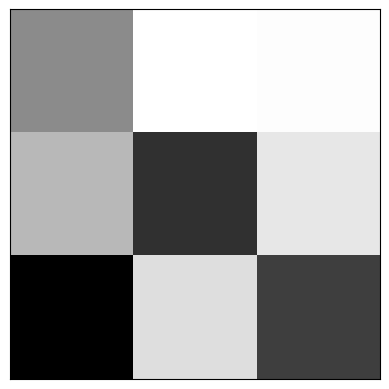

In [16]:
plt.imshow(kernel_i, cmap=plt.cm.gray) 
plt.xticks([])
plt.yticks([])
plt.show()

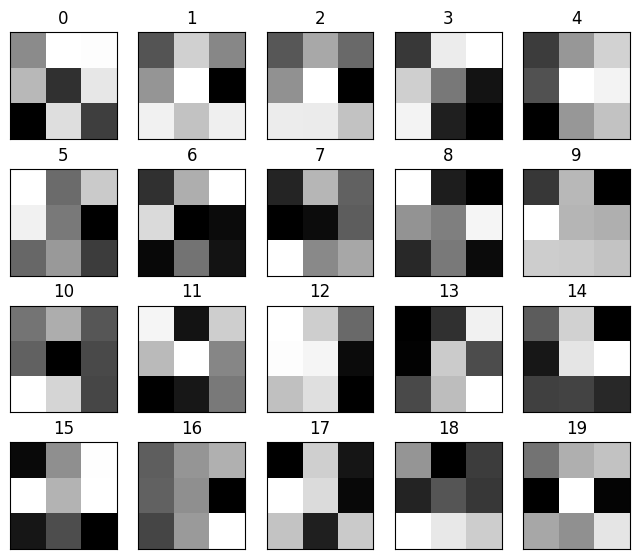

In [17]:
nplots = 20 
fig = plt.figure(figsize=(8, 6.8))
for j in range(nplots):
    plt.subplot(4, 5, j+1)
    plt.imshow(kernels[:, :, 0, j], cmap=plt.cm.gray)
    plt.title(j)
    plt.xticks([]); plt.yticks([])

plt.show()

# ws 06

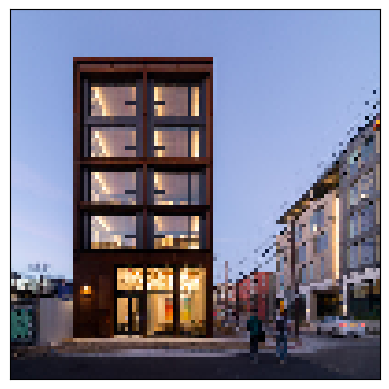

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.models import Model
from matplotlib import pyplot

image = load_img('building1.jpg', target_size=(100, 100))

plt.imshow(image)
plt.xticks([]), plt.yticks([])

plt.show()

In [19]:
img = img_to_array(image)
print('shape=',img.shape)
print('max pixel value=',np.max(img))

shape= (100, 100, 3)
max pixel value= 255.0


In [20]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 100, 100, 3)

In [21]:
from tensorflow.keras.models import Model

layer_idx = 0
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


(1, 98, 98, 32)

In [22]:
feature_maps.min(), feature_maps.max()

(0.0, 280.15762)

In [23]:
f_min, f_max = feature_maps.min(), feature_maps.max()
feature_maps = (feature_maps - f_min) / (f_max - f_min)
feature_maps.min(), feature_maps.max()

(0.0, 1.0)

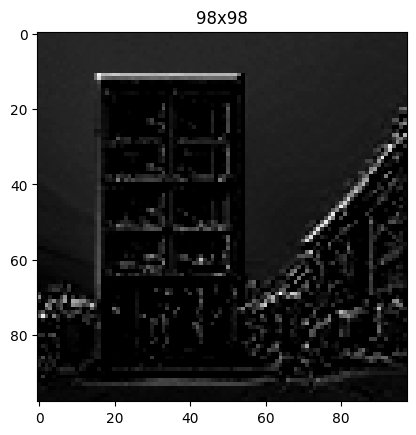

In [24]:
sample_idx = 0
fea_idx = 10
feature_map_i = feature_maps[sample_idx, :, :, fea_idx]

plt.title('{}x{}'.format(feature_map_i.shape[0],feature_map_i.shape[0]))
plt.imshow(feature_map_i, cmap=plt.cm.gray)
plt.show()

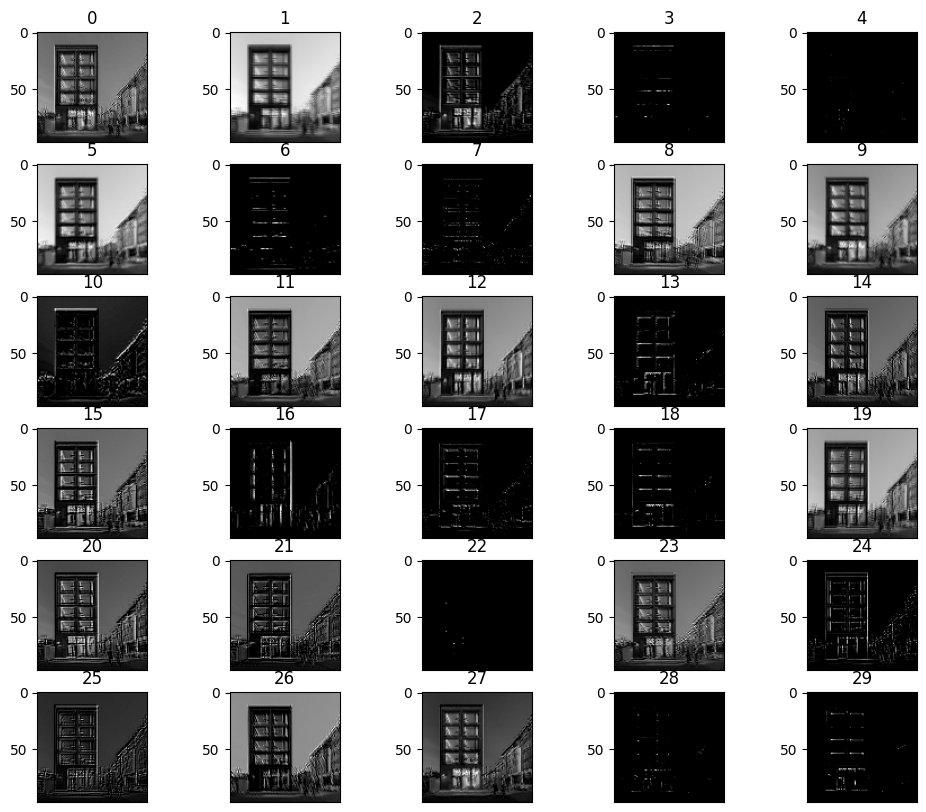

In [25]:
nplots = 30
fig = plt.figure(figsize=(12, 10)) 
for j in range(nplots):
    plt.subplot(6, 5, j+1)
    plt.imshow(feature_maps[sample_idx, :, :, j], cmap=plt.cm.gray)
    plt.title(j)
    plt.xticks([]) # ; plt.yticks([])

plt.show()